# 1. RNN model with sync 1 recording

In [1]:
import pandas as pd
import numpy as np

file='../raw_data/1.0.3/training_data.csv'
df=pd.read_csv(file)
df.head()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


In [2]:
def drop_duplicates(data):
    doublon=data[['Patient ID','Additional ID']].dropna()
    liste_couple=[]
    for i in range(len(doublon)):
        min_id=min(doublon.iloc[i]['Patient ID'],doublon.iloc[i]['Additional ID'])
        max_id=max(doublon.iloc[i]['Patient ID'],doublon.iloc[i]['Additional ID'])
        if [min_id,max_id] not in liste_couple:
            liste_couple.append([min_id,max_id])
    list_id_drop=np.array(liste_couple)[:,1]
    data_drop_dup=data[~data['Patient ID'].isin(list_id_drop)]
    return data_drop_dup

In [3]:
df_drop_dup=drop_duplicates(df)
df_drop_dup

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,85340,AV+PV+TV+MV,Child,Male,105.0,16.6,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
938,85341,AV+PV+TV+MV,Child,Male,92.0,15.2,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN
939,85343,AV+PV+TV+MV,Child,Female,97.0,13.5,False,Present,MV+TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
940,85345,AV+PV,Child,Female,132.0,38.1,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,CC2015,NaN


In [ ]:
import glob
import librosa
name, start, duration=[],[],[]
for f in glob.glob(f'/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/training_data/*.tsv'):
    x=(''.join(f.rsplit('.tsv',1))).split('/')
    name.append(x[-1])
    
    cs=pd.read_csv(f, sep='\t')
 
    sta=cs.iloc[0,0]

    sto=cs.iloc[19,1]

    dura=sto-sta
    start.append(sta)
    duration.append(dura)


In [ ]:
for index in range(len(name)):
    file='/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/training_data/'+name[index]+'.wav'
    x_1, fs=librosa.load(file, sr=None, offset=start[index], duration=duration[index])
    
    output='/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/npy_sync_5_cycles/'+name[index]+'.npy'
    np.save(output,x_1)

In [4]:
ls=[]
for ind in df_drop_dup.index:
    r=df_drop_dup.loc[ind, 'Recording locations:'].split('+')
    l=np.random.choice(r)
    ls.append(l)

In [5]:
df_new=pd.DataFrame({'Patient_id': df_drop_dup['Patient ID'], 
                     'select': ls,
                     'audible': df_drop_dup['Most audible location']
                    })
df_new

,Patient_id,select,audible
0,2530,PV,NaN
1,9979,AV,TV
2,9983,TV,NaN
3,13918,PV,TV
4,14241,TV,PV
...,...,...,...
937,85340,AV,NaN
938,85341,PV,NaN
939,85343,TV,TV
940,85345,AV,NaN


In [6]:
df_new.audible.fillna(df_new.select, inplace=True)
df_new

,Patient_id,select,audible
0,2530,PV,PV
1,9979,AV,TV
2,9983,TV,TV
3,13918,PV,TV
4,14241,TV,PV
...,...,...,...
937,85340,AV,AV
938,85341,PV,PV
939,85343,TV,TV
940,85345,AV,AV


In [7]:
def load_npy(a,b):
    file=f"../raw_data/1.0.3/npy_sync_5_cycles/{a}_{b}.npy"
    v=np.load(file)[0:10000]
    return v

la=[]
for i in df_new.index:
    la.append(load_npy(df_new.Patient_id[i], df_new.audible[i]))

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad=pad_sequences(la, dtype='float32', padding='post', value=-99)
X_pad

array([[ 1.4343262e-02,  2.1850586e-02,  2.5512695e-02, ...,
         5.7678223e-03,  1.2176514e-02,  1.6235352e-02],
       [ 4.1198730e-03,  1.7425537e-02,  2.6947021e-02, ...,
         3.1524658e-02,  2.9327393e-02,  2.4658203e-02],
       [-2.7679443e-02, -2.7954102e-02, -1.0345459e-02, ...,
        -9.9000000e+01, -9.9000000e+01, -9.9000000e+01],
       ...,
       [ 6.8359375e-03,  4.1198730e-03,  4.6997070e-03, ...,
        -9.9000000e+01, -9.9000000e+01, -9.9000000e+01],
       [-3.2287598e-02, -1.8402100e-02,  1.5869141e-02, ...,
         8.9721680e-03, -2.1362305e-03, -2.4414062e-04],
       [-4.4860840e-03, -9.4299316e-03, -1.7700195e-03, ...,
         4.6081543e-03,  1.6052246e-02,  9.8876953e-03]], dtype=float32)

In [9]:
X_rec=np.expand_dims(X_pad, axis=-1)
X_rec.shape

(872, 10000, 1)

In [10]:
y_rec=df_drop_dup.Outcome.map({'Abnormal': 1, 'Normal': 0})
y_rec.shape

(872,)

In [11]:
from tensorflow.keras.layers import Masking, LSTM, Conv1D, Dense, MaxPool1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall

In [12]:
from sklearn.model_selection import train_test_split

X_rec_train, X_rec_test, y_rec_train, y_rec_test= train_test_split(X_rec, y_rec, test_size=0.3)

In [13]:
def create_model():
    model_rec=Sequential()
    model_rec.add(Masking(mask_value=-99, input_shape=X_rec.shape[1:]))
    model_rec.add(Conv1D(24, kernel_size=15, strides=2, activation='relu'))
    model_rec.add(MaxPool1D(3, strides=2))
    model_rec.add(Conv1D(48, kernel_size=7, strides=2, activation='relu'))
    model_rec.add(MaxPool1D(3, strides=2))
    model_rec.add(Conv1D(96, kernel_size=7, strides=2, activation='relu'))
    model_rec.add(MaxPool1D(3, strides=2))
    model_rec.add(LSTM(units=20, return_sequences=True))
    model_rec.add(LSTM(units=20, return_sequences=True))
    model_rec.add(LSTM(units=20, return_sequences=True))
    model_rec.add(LSTM(units=20, return_sequences=True))
    model_rec.add(LSTM(units=20, return_sequences=False))
    model_rec.add(Dense(1, activation='sigmoid'))
    
    return model_rec

In [14]:
adam=Adam(learning_rate=0.001)
model_2=create_model()
model_2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy', Recall()])

In [15]:
es=EarlyStopping(patience=20, restore_best_weights=True, monitor='accuracy')
history_2=model_2.fit(X_rec_train, y_rec_train, batch_size=32, epochs=150, validation_split=0.3, callbacks=[es])

Epoch 1/150


/Users/fabianlaw/.pyenv/versions/3.10.6/envs/circor/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2022-11-30 17:13:50.880302: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


14/14 [==============================] - 6s 182ms/step - loss: 0.6926 - accuracy: 0.5433 - recall: 0.0354 - val_loss: 0.6898 - val_accuracy: 0.5683 - val_recall: 0.0000e+00
Epoch 2/150
14/14 [==============================] - 2s 120ms/step - loss: 0.6886 - accuracy: 0.5550 - recall: 0.0505 - val_loss: 0.6817 - val_accuracy: 0.5738 - val_recall: 0.1519
Epoch 3/150
14/14 [==============================] - 2s 121ms/step - loss: 0.6951 - accuracy: 0.5433 - recall: 0.4798 - val_loss: 0.6794 - val_accuracy: 0.5738 - val_recall: 0.0506
Epoch 4/150
14/14 [==============================] - 2s 120ms/step - loss: 0.6877 - accuracy: 0.5550 - recall: 0.0455 - val_loss: 0.6836 - val_accuracy: 0.5738 - val_recall: 0.0253
Epoch 5/150
14/14 [==============================] - 2s 122ms/step - loss: 0.6865 - accuracy: 0.5527 - recall: 0.0404 - val_loss: 0.6832 - val_accuracy: 0.5683 - val_recall: 0.0380
Epoch 6/150
14/14 [==============================] - 2s 121ms/step - loss: 0.6835 - accuracy: 0.5550 - 

14/14 [==============================] - 2s 132ms/step - loss: 0.0264 - accuracy: 0.9953 - recall: 1.0000 - val_loss: 1.7830 - val_accuracy: 0.5683 - val_recall: 0.5063
Epoch 92/150
14/14 [==============================] - 2s 131ms/step - loss: 0.0156 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 1.8224 - val_accuracy: 0.5574 - val_recall: 0.4810
Epoch 93/150
14/14 [==============================] - 2s 130ms/step - loss: 0.0110 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 1.9025 - val_accuracy: 0.5464 - val_recall: 0.5063
Epoch 94/150
14/14 [==============================] - 2s 130ms/step - loss: 0.0080 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 1.9588 - val_accuracy: 0.5519 - val_recall: 0.5316
Epoch 95/150
14/14 [==============================] - 2s 132ms/step - loss: 0.0069 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 2.0002 - val_accuracy: 0.5628 - val_recall: 0.5316
Epoch 96/150
14/14 [==============================] - 2s 132ms/step - loss: 0.0061 - accuracy: 1.0000 -

In [16]:
def plot_loss_recall(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=1)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['recall'])
    ax2.plot(history.history['val_recall'])
    ax2.set_title('RECALL')
    ax2.set_ylabel('Recall')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=1)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

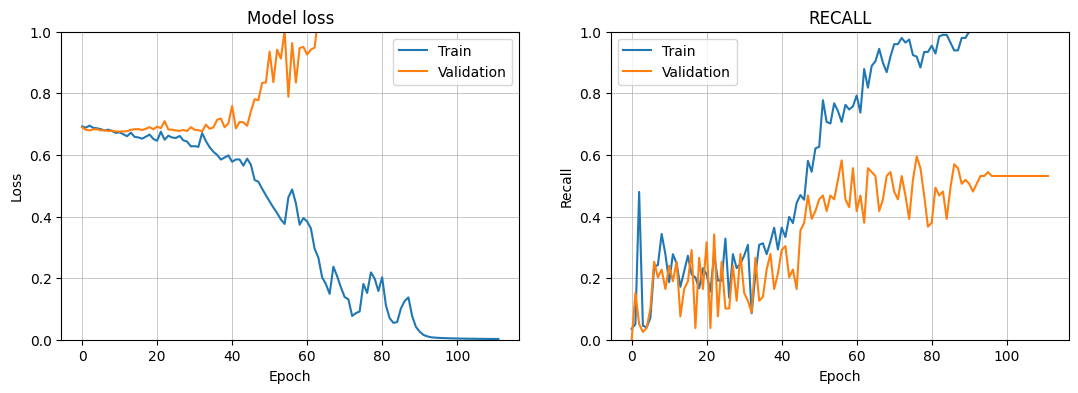

In [17]:
import matplotlib.pyplot as plt
plot_loss_recall(history_2)

In [18]:
es.best_epoch

91

In [19]:
model_2.evaluate(X_rec_test, y_rec_test)

9/9 [==============================] - 0s 25ms/step - loss: 1.9843 - accuracy: 0.5458 - recall: 0.5000


[1.9843339920043945, 0.5458015203475952, 0.5]